<a href="https://colab.research.google.com/github/alexandergribenchenko/Adivino_tu_mano/blob/main/Adivino_tu_mano_(Notebook_Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¡Adivino tu mano!

En este notebook encontrarás los insumos necesarios para crear una pequeña aplicación basada en Redes Neuronales que predice, a partir de una imagen jpg o png, el número que tratas de hacer con el gesto de tu mano.

Puedes ver en el todo el preprocesamiento que debimos hacer sobre las imagenes, la etapa de desarrollo del modelo y por último las funciones que serán necesarias como parte del script que emplearemos para desplegar nuestra aplicación en Streamlit.

# 1. Conexión al repositorio donde tenemos nuestras imagenes

In [1]:
# Generamos una conexión a nuestra carpeta de Drive que nos permita tener acceso 
# a los carpetas donde tenemos nuestras imagenes de entrenamiento, validación y test
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Librerías necesarias para el desarrollo del proyecto

In [2]:
# Importamos las librerías necesarias para el proyecto

# Librerías necesarias para el procesamiento numérico y de graficación
import numpy as np
import matplotlib.pyplot as plt

# Librerías necesarias para implementar el modelo basado en redes neuronales
import tensorflow as tf
from tensorflow import keras

# Librería necesaria para importar y procesar imagenes
from PIL import Image, ImageOps

# Librería necesaria para obtener los nombres y paths de todas nuestras imagenes
import os 

# 3. Ejemplo de como se importa y preprocesa una única imagen

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(64, 64, 3)


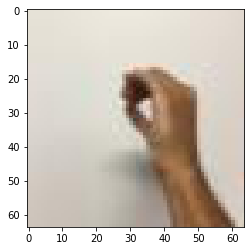

In [19]:
# Ejemplo de como podemos importar y visualizar una de las imagenes de nuestro set de entrenamiento

# Importamos la imagen:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg')

# Visualizamos el tipo de objeto que es:
print(type(image))

# Hacemos una conversión a tipo array de numpy:
image_np = np.asarray(image)
print(type(image_np))

# Visualizamos las dimensiones del nuevo arreglo:
print(image_np.shape)

# Visualizamos las imagen importada:
plt.imshow(image_np)

(64, 64)


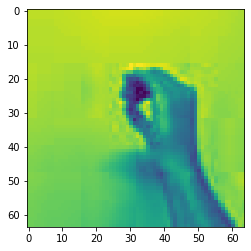

In [20]:
# Dado que resultara más liviano y útil para la red neuronal, la clasificación la 
# haremos unicamante empleando el primer canal del RGB de la imagen

# Chequeamos la nueva dimensión del array 
print(image_np[:,:,0].shape)

# Visualizamos las imagen tras la trasformación:
plt.imshow(image_np[:,:,0])

# 4. Obtención de la totalidad de los paths y nombres de nuestras imagenes

In [21]:
# Definimos una función que nos permita obtener una lista con todos los paths o
# nombres de las imagenes con las que deseamos trabajar
# Entradas
# - dir: ruta del directorio del que deseamos obtener las imagenes
# - tipo: nos permite obtener o bien obtener los nombre o el paths de todas las imagenes
#         (las entrasas posibles son respectivamante: 'paths' o 'names )
# Salida
# - salida: lista con los nombres o los paths de todas las imagenees en la carpeta dir
def list_dir(dir, tipo):
    file_names = os.listdir(dir)
    if tipo=='names':
       salida = [file_name for file_name in file_names]
    elif tipo=='paths': 
      salida = [os.path.abspath(os.path.join(dir,file_name)) for file_name in file_names]
    return salida

##### **---> Lista de paths y nombres del conjunto train**

In [22]:
# Empleamos nuestra función para obtener las listas con los nombres y los path del conjunto de train
list_names_train_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs', 'names')
list_paths_train_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs', 'paths')

# Visualicemos la cantidad total de imagenes de nuestro conjunto de train
print(len(list_paths_train_signs))

# Visualicemos a manera de ejemplo los primeros 5 elementos de los nombres
print(list_names_train_signs[:5])

# Visualicemos a manera de ejemplo los primeros 5 elementos de los paths
list_paths_train_signs[:5]

864
['2_IMG_4702.jpg', '1_IMG_4391.jpg', '1_IMG_4561.jpg', '1_IMG_4448.jpg', '0_IMG_5932.jpg']


['/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/2_IMG_4702.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/1_IMG_4391.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/1_IMG_4561.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/1_IMG_4448.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/0_IMG_5932.jpg']

##### **---> Lista de paths y nombres del conjunto de test**: (nota: denominamos test al conjunto que se diferencia de train (que puede ser val o test y que puede elegirse sin que deba modificarse el código en adelante))

In [23]:
# Empleamos nuestra función para obtener las listas con los nombres y los path del conjunto de test
list_names_test_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs', 'names')
list_paths_test_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs', 'paths')

# Visualicemos la cantidad total de imagenes de nuestro conjunto de test
print(len(list_paths_test_signs))

# Visualicemos a manera de ejemplo los primeros 5 elementos de los nombres
print(list_names_test_signs[:5])

# Visualicemos a manera de ejemplo los primeros 5 elementos de los paths
list_paths_test_signs[:5]

120
['4_IMG_5425.jpg', '0_IMG_5969.jpg', '3_IMG_6110.jpg', '5_IMG_5621.jpg', '1_IMG_4523.jpg']


['/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/4_IMG_5425.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5969.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/3_IMG_6110.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/5_IMG_5621.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/1_IMG_4523.jpg']

# 5. Obtención de los arrays con los labels para el entrenamiento y evaluación

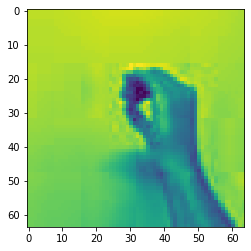

In [25]:
# Observamos que los nombres de las imagenes contienen siempre como primer elemento
# el label de la imagen (el numero 'verdadero' al que se asocia la imagen que se pretendio representar con la mano)

# A manera de ejemplo vemos que la imagen que lleva por nombre 0_IMG_5942.jpg, trato de representar el número 0
image_np_r = np.asarray(Image.open('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg'))[:,:,0]

# Visualizamos las imagen importada:
plt.imshow(image_np_r)

##### **---> Array con los labels del conjunto de train**

In [26]:
# Empleando el primer digito del nombre y a partir de un list comprenhention 
# obtenemnos la totalidad de los labels para el conjunto de train
# (Este arreglo ya tiene las dimensiones necesarias para ser empleado como label en keras)
train_labels = np.asarray([int(name[0]) for name  in list_names_train_signs])

# Imprimimos para corroborar el tamaño del arreglo para el conjunto de train
print(train_labels.shape)

# Visualizamos a manera de ejemplo los 20 primeros registros
train_labels[:20]

(864,)


array([2, 1, 1, 1, 0, 3, 2, 2, 4, 3, 1, 1, 5, 4, 4, 1, 5, 1, 2, 3])

##### **---> Array con los labels del conjunto de test**

In [27]:
# Empleando el primer digito del nombre y a partir de un list comprenhention 
# obtenemnos la totalidad de los labels para el conjunto de test
# (Este arreglo ya tiene las dimensiones necesarias para ser empleado como label en keras)
test_labels = np.asarray([int(name[0]) for name  in list_names_test_signs])

# Imprimimos para corroborar el tamaño del arreglo para el conjunto de test
print(test_labels.shape)

# Visualizamos a manera de ejemplo los 20 primeros registros
test_labels[:20]

(120,)


array([4, 0, 3, 5, 1, 4, 2, 1, 1, 2, 4, 0, 0, 0, 3, 4, 5, 2, 4, 0])

# 6. Obtención de los arrays de las imagenes de entrenamiento y evaluación

##### **---> Array con las imagenes del conjunto de train**

In [28]:
# Empleando el mismo procedimiento del numeral 3 para una única imagen, y haciendo uno de 
# una list comprenhention obtenemos una array con la información de todas las imagenes del conjunto de train
train_images = np.array([np.asarray(Image.open(path))[:,:,0] for path in list_paths_train_signs])

# Visualizamos inicialmente la forma de dicha matriz (tal como esta no es aceptada por keras)
print(train_images.shape)

# Generamos un reshape de tal manera que pueda tener la forma que es aceptada por keras
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
print(train_images.shape)

# Finalmente convertimos la escala de 0 a 255, a una escala normalizada entre 0 y 1 con valores flotantes
# (Es una recomendación recurrente al trabajar con imagenes y redes neuronales para su clasificación)
train_images = train_images.astype('float32')/255

(864, 64, 64)
(864, 64, 64, 1)


##### **---> Array con los labels del conjunto de test**

In [29]:
# Empleando el mismo procedimiento del numeral 3 para una única imagen, y haciendo uno de 
# una list comprenhention obtenemos una array con la información de todas las imagenes del conjunto de test
test_images = np.array([ np.asarray(Image.open(path))[:,:,0] for path in list_paths_test_signs])

# Visualizamos inicialmente la forma de dicha matriz (tal como esta no es aceptada por keras)
print(test_images.shape)

# Generamos un reshape de tal manera que pueda tener la forma que es aceptada por keras
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
print(test_images.shape)

# Finalmente convertimos la escala de 0 a 255, a una escala normalizada entre 0 y 1 con valores flotantes
# (Es una recomendación recurrente al trabajar con imagenes y redes neuronales para su clasificación)
test_images = test_images.astype('float32')/255

(120, 64, 64)
(120, 64, 64, 1)


# 7. Modelo básico de clasificación de redes neuronales

In [50]:
# Entrenemos un primer modelo de red neuronal con 2 capas densas y una capa de salida.
# Nuestros posibles numeros van de 0 a 5, por tanto son 6 opciones que son las que debemos
# emplear como argumento en la capa de salida. Emplearemos la función de activación softmax
# ya que las salidas son unicas y excluyentes entre si y ademas podremos interpretar la 
# predicción como un valor de probabilidad asociado a cada uno de los 6 valores.
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit( train_images, train_labels, epochs=70, batch_size=32, verbose=1)

Epoch 1/70
27/27 [==============================] - 0s 2ms/step - loss: 4.5776 - accuracy: 0.1404
Epoch 2/70
27/27 [==============================] - 0s 2ms/step - loss: 1.8585 - accuracy: 0.2233
Epoch 3/70
27/27 [==============================] - 0s 2ms/step - loss: 1.8018 - accuracy: 0.2340
Epoch 4/70
27/27 [==============================] - 0s 2ms/step - loss: 1.7566 - accuracy: 0.3078
Epoch 5/70
27/27 [==============================] - 0s 2ms/step - loss: 1.6878 - accuracy: 0.3173
Epoch 6/70
27/27 [==============================] - 0s 2ms/step - loss: 1.5879 - accuracy: 0.3528
Epoch 7/70
27/27 [==============================] - 0s 2ms/step - loss: 1.5143 - accuracy: 0.3647
Epoch 8/70
27/27 [==============================] - 0s 2ms/step - loss: 1.4933 - accuracy: 0.4017
Epoch 9/70
27/27 [==============================] - 0s 2ms/step - loss: 1.3992 - accuracy: 0.4236
Epoch 10/70
27/27 [==============================] - 0s 2ms/step - loss: 1.4306 - accuracy: 0.4522
Epoch 11/70
27/27 [

In [51]:
# Evaluemos nuestro modelo respecto a los datos de test
model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.7687 - accuracy: 0.7083


[0.7687193751335144, 0.7083333134651184]

# 8. Modelo de clasificación (con una aproximación convolucional)



In [56]:
# Entrenemos ahora un modelo con una aproximación convolucional y veamos su performance
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(64,64,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=8, batch_size=32)

Epoch 1/8
27/27 [==============================] - 1s 10ms/step - loss: 2.6080 - accuracy: 0.1791
Epoch 2/8
27/27 [==============================] - 0s 8ms/step - loss: 1.7666 - accuracy: 0.3404
Epoch 3/8
27/27 [==============================] - 0s 8ms/step - loss: 1.6510 - accuracy: 0.4601
Epoch 4/8
27/27 [==============================] - 0s 8ms/step - loss: 1.3391 - accuracy: 0.5554
Epoch 5/8
27/27 [==============================] - 0s 8ms/step - loss: 1.0042 - accuracy: 0.6779
Epoch 6/8
27/27 [==============================] - 0s 9ms/step - loss: 0.8193 - accuracy: 0.7287
Epoch 7/8
27/27 [==============================] - 0s 9ms/step - loss: 0.5972 - accuracy: 0.8120
Epoch 8/8
27/27 [==============================] - 0s 8ms/step - loss: 0.4834 - accuracy: 0.8515


In [55]:
# Evaluemos nuestro modelo respecto a los datos de test
model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 0.7259 - accuracy: 0.7583


[0.7258535027503967, 0.7583333253860474]

# 9. Modelo de clasificación (con una aproximación convolucional)

In [65]:
# Entrenemos ahora un modelo con una aproximación convolucional con capas adicionales
# (AveragePooling2D, MaxPool2D, Dropout)
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(64,64,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=50, batch_size=32)

Epoch 1/50
27/27 [==============================] - 0s 3ms/step - loss: 1.8008 - accuracy: 0.1706
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 1.7848 - accuracy: 0.1981
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 1.7545 - accuracy: 0.2801
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 1.6568 - accuracy: 0.3349
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 1.5195 - accuracy: 0.4322
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 1.3750 - accuracy: 0.5018
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 1.2705 - accuracy: 0.5104
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 1.1914 - accuracy: 0.5609
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 1.1347 - accuracy: 0.5764
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 1.1171 - accuracy: 0.5830
Epoch 11/50
27/27 [

In [66]:
# Evaluemos nuestro modelo respecto a los datos de test
# (Observamos que el accuracy tanto para train como para test es del orden del 90%)
model.evaluate(test_images,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.9083


[0.32008835673332214, 0.9083333611488342]

# 10. Guardando y cargando el modelo

In [68]:
# Una vez hemos determinado nuestro mejor modelo lo guardamos para generar prediciones de manera posterior
tf.keras.models.save_model(model,'/content/drive/MyDrive/Colab Notebooks/Adivino_tu_mano_(Modelo).hdf5')

In [69]:
# Si queremos hacer uso de nuestro modelo únicamante debemos cargarlo
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Adivino_tu_mano_(Modelo).hdf5')

In [70]:
# Corroboramos que el modelo cargado esta haciendo las prediciones de manera adecuada
loaded_model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.9083


[0.32008835673332214, 0.9083333611488342]

# 11. Prediciendo para un único ejemplo (función base para aplicativo de Sreamlit)

(507, 338, 3)


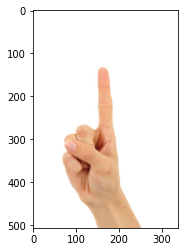

In [71]:
# Emplearemos nuestro modelo ahora para hacer la predicción sobre una imagen cualquiera
# (Observar que la imagen no hace parte de ninguno de los dataset de train y tampoco tiene la misma resolución)
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Imagen_otro_size_1.jpg')
print(np.asarray(image).shape)
plt.imshow(image)

In [72]:
# Dado que la imagen que se importa puede tener cualquier resolución, debemos adecuarla
# para que nuestro modelo creado pueda generar su predicción. Redimensionamos la imagen
# llevandola a la resolucion 64x64 que fue la que empleamos para el desarrollo de nuestro modelo. 
# Adicionalmente generamos todas las transformaciones necesarias a la imagen necesarias por el modelo.
# La función generará la transformación y la predicción de nuestra nueva imagen. 
# (Esta función la emplearemos como parte del archivo de stremlit para el despliegue de la aplicación)
def transform_and_predict(image, model):
        size = (64,64)
        image = ImageOps.fit(image, size, Image.ANTIALIAS)
        image_paso_00 = np.asarray(image)
        image_paso_01 = image_paso_00[:,:,0]
        image_paso_02 = np.array([image_paso_01])
        image_paso_03= image_paso_02.reshape(image_paso_02.shape[0], image_paso_02.shape[1], image_paso_02.shape[2], 1)
        image_paso_04 = image_paso_03.astype('float32')/255
        prediction = model.predict(image_paso_04)
        return prediction

In [73]:
# Generemos ahora la predicción empleando la función descrita
prediction = transform_and_predict(image, loaded_model)
print(prediction)
print(np.argmax(prediction))

[[0.00193204 0.19087984 0.02313777 0.67899454 0.01489812 0.09015767]]
3
